<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Figures-for-divergence-timing-manuscript." data-toc-modified-id="Figures-for-divergence-timing-manuscript.-1">Figures for divergence timing manuscript.</a></span><ul class="toc-item"><li><span><a href="#Notebook-Setup" data-toc-modified-id="Notebook-Setup-1.1">Notebook Setup</a></span><ul class="toc-item"><li><span><a href="#Load-packages" data-toc-modified-id="Load-packages-1.1.1">Load packages</a></span></li><li><span><a href="#Colors" data-toc-modified-id="Colors-1.1.2">Colors</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.1.3">Functions</a></span></li></ul></li><li><span><a href="#Substitution-model-comparison" data-toc-modified-id="Substitution-model-comparison-1.2">Substitution model comparison</a></span><ul class="toc-item"><li><span><a href="#Stationary-states" data-toc-modified-id="Stationary-states-1.2.1">Stationary states</a></span></li><li><span><a href="#$\Gamma$-distribution-plot" data-toc-modified-id="$\Gamma$-distribution-plot-1.2.2">$\Gamma$-distribution plot</a></span></li></ul></li><li><span><a href="#Decay-to-stationary-state" data-toc-modified-id="Decay-to-stationary-state-1.3">Decay to stationary state</a></span><ul class="toc-item"><li><span><a href="#Pref-Snippets" data-toc-modified-id="Pref-Snippets-1.3.1">Pref Snippets</a></span></li></ul></li><li><span><a href="#Simulations" data-toc-modified-id="Simulations-1.4">Simulations</a></span></li><li><span><a href="#Empirical-Data" data-toc-modified-id="Empirical-Data-1.5">Empirical Data</a></span><ul class="toc-item"><li><span><a href="#Prefs-snippet" data-toc-modified-id="Prefs-snippet-1.5.1">Prefs snippet</a></span></li><li><span><a href="#Trees" data-toc-modified-id="Trees-1.5.2">Trees</a></span></li></ul></li><li><span><a href="#Shifting-Preferences-vs.-Long-Branches" data-toc-modified-id="Shifting-Preferences-vs.-Long-Branches-1.6">Shifting Preferences vs. Long Branches</a></span></li><li><span><a href="#phylobayes-comparison" data-toc-modified-id="phylobayes-comparison-1.7"><code>phylobayes</code> comparison</a></span></li><li><span><a href="#Logoplots" data-toc-modified-id="Logoplots-1.8">Logoplots</a></span><ul class="toc-item"><li><span><a href="#Doud-logoplots" data-toc-modified-id="Doud-logoplots-1.8.1">Doud logoplots</a></span></li><li><span><a href="#Lee-logoplots" data-toc-modified-id="Lee-logoplots-1.8.2">Lee logoplots</a></span></li><li><span><a href="#Average-logoplots" data-toc-modified-id="Average-logoplots-1.8.3">Average logoplots</a></span></li><li><span><a href="#mutSel-logoplots" data-toc-modified-id="mutSel-logoplots-1.8.4">mutSel logoplots</a></span></li></ul></li></ul></li></ul></div>

# Figures for divergence timing manuscript. 

Below is the code to generate the un-edited versions of the figures for the divergence timing manuscript.   
The final verisons can be found in `figures.pptx`. 

## Notebook Setup

### Load packages

Here are the packages I used to create the figures and their associated references: 

1. [`ggplot2`](https://cran.r-project.org/web/packages/ggplot2/citation.html)
2. [`cowplot`](https://github.com/wilkelab/cowplot)
3. [`ggseqlogo`](https://github.com/omarwagih/ggseqlogo)
4. [`ggtree`](https://bioconductor.org/packages/release/bioc/html/ggtree.html)

In [1]:
library(ggplot2)
library(cowplot)
require(ggseqlogo)
library(ggtree)
library(grid)
library(gridExtra)
library(dplyr)


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: ggseqlogo
Loading required package: treeio
ggtree v1.8.2  For help: https://guangchuangyu.github.io/ggtree

If you use ggtree in published research, please cite:
Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution 2017, 8(1):28-36, doi:10.1111/2041-210X.12628

Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following object is masked from ‘package:ggtree’:

    collapse

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Colors 

In [2]:
black = "black"
blue = "#439FC3"
green = "#76A88D"
orange = "#F9842A"
red = "#B52A24"
pink = "#CC79A7"
purple = "#8E7790"

small_color = '#f76ab4'
nucleophilic_color = '#ff7f00'
hydrophobic_color = '#12ab0d'
aromatic_color = '#84380b'
acidic_color = '#3c58e5'
amide_color = '#972aa8'
basic_color = '#e41a1c'
functionalGroup = make_col_scheme(chars=c('G', 'A', 'S', 'T', 'C', 'V', 'L', 'I', 'M', 'P', 'F', 'Y', 'W', 'D', 'E', 'H', 'K', 'R', 'N', 'Q'), 
                                  cols=c(small_color, small_color, nucleophilic_color, nucleophilic_color, nucleophilic_color, hydrophobic_color,hydrophobic_color,hydrophobic_color,hydrophobic_color,hydrophobic_color, aromatic_color,aromatic_color,aromatic_color, acidic_color, acidic_color, basic_color, basic_color, basic_color,amide_color,amide_color))


### Functions 

In [3]:
# This function returns the tree plot object
make_tree <- function(fname, name, limit, c){
  tree <- read.tree(fname) 
  p <- ggtree(tree, color = c, size=.75) + ggtitle(name) + theme_tree2() + scale_x_continuous(limits = c(0, limit)) 
}

# This function returns a tree with the appropriate colors for the competing effects plot
group_tip_names <- function(groups,tip_names) {
  target_groups <- unlist(lapply(groups, function(x) paste("HA_HA_", x, "$",sep = ""))) # which group names to look for?
  matches <- apply(sapply(target_groups, grepl, tip_names, ignore.case=TRUE), 1, any) # which tip names have those group names
  matches <- sapply(tip_names[matches], paste0, collapse="") # subset the matches
  return(matches)
}

make_tree_compete <- function(fname, group1, group2, group3, limit){
  tree <- read.tree(fname)
  
  # set up the groups for colors 
  tip_names = get.tree(tree)$tip.label
  color_groups <- list(high=group_tip_names(group1, tip_names),
                       intermediate=group_tip_names(group2, tip_names),
                       low=group_tip_names(group3, tip_names))
  tree <- groupOTU(tree, focus=color_groups)
  
  p <- ggtree(tree, aes(color=group), size=.75) + theme_tree2() + scale_x_continuous(limits = c(0, limit))   
  return(p)
}

# This function takes a preferences dataframe and a $\beta$ value and returns a matrix to be read into `ggseqlogo`
prefs_to_matrix <- function(df, beta) {
  rownames(df) = df$site
  df <- subset(df, select = -c(site) )
  df <- t(df) ^ beta
  return(df)
}

# This function makes the logoplot object
make_prefs_plot <- function(l){
  prefs <- ggplot() + geom_logo(l, method="prob",col_scheme=functionalGroup) + theme_logo(base_size = 30) 
    prefs <-  prefs + facet_wrap(~seq_group, ncol=1, scales='free_x') 
    prefs <- prefs + theme(axis.text.y=element_blank(), 
                           axis.title.y=element_blank(), 
                           axis.text.x=element_blank(), 
                           strip.text=element_blank()) # remove y-axis text.
    return(prefs)  
}


## Substitution model comparison

Below is the code to make figure to compare the different substitution models. This figure has three pieces:  

1. Short stretches of logoplot to compare stationary states 
2. Plot of $\Gamma$-distribution for rate variation 
3. Feature comparison for the four models in the paper (added in powerpoint)

### Stationary states 

This part of the plot will show small stretches of the stationary state from a `YNGKP M0` model and an `ExpCM`. 
The stationary states were made using a script found in `decay_to_stationary`. 

Saving 10 x 7 in image


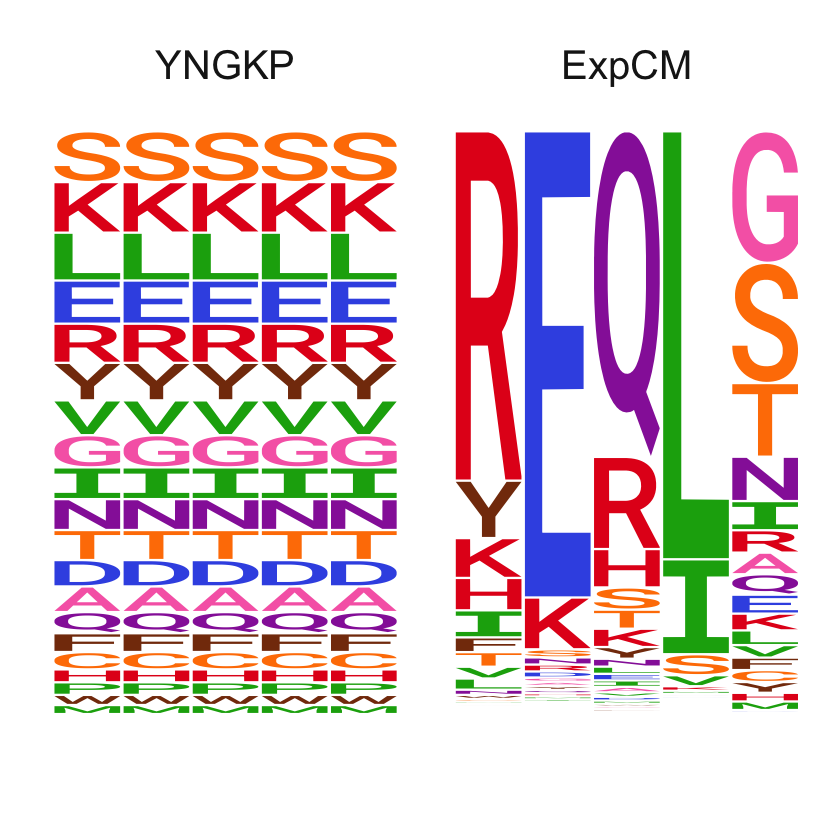

In [7]:
targets = c(90,51,481,490,23,395,81)
l = 
l = list(YNGKP=prefs_to_matrix(read.csv("../../analysis/decay_to_stationary/outputs/YNGKP_M0_stationarystate.csv"), 1.0), ExpCM=prefs_to_matrix(read.csv("../../analysis/decay_to_stationary/outputs/ExpCM_stationarystate.csv"),1.0)) 
ss <- ggplot() + geom_logo(l, method="prob",col_scheme=functionalGroup) + theme_logo(base_size = 30) 
ss <-  ss + facet_wrap(~seq_group, ncol=2, scales='free_x') 
ss <- ss + theme(axis.text.y=element_blank(), axis.title.y=element_blank(), axis.text.x=element_blank()) # remove y-axis text.
ss
ggsave("_raw_ss.png", width=10)

### $\Gamma$-distribution plot

This plot shows the 4 $\omega$ values from a YNGKP M5 and the 1 $\omega$ value from a YNGKP M0. 
The values are found in the file `wr.csv` in the `decay_to_stationary/outputs/` 

Warning message:
“Removed 50 rows containing missing values (geom_path).”

Saving 7 x 7 in image
Warning message:
“Removed 50 rows containing missing values (geom_path).”

means,model,y_axis
0.00458686,M5,0.00
0.03361759,M5,0.00
0.10764779,M5,0.00
0.37455593,M5,0.00
0.10041300,M0,0.75


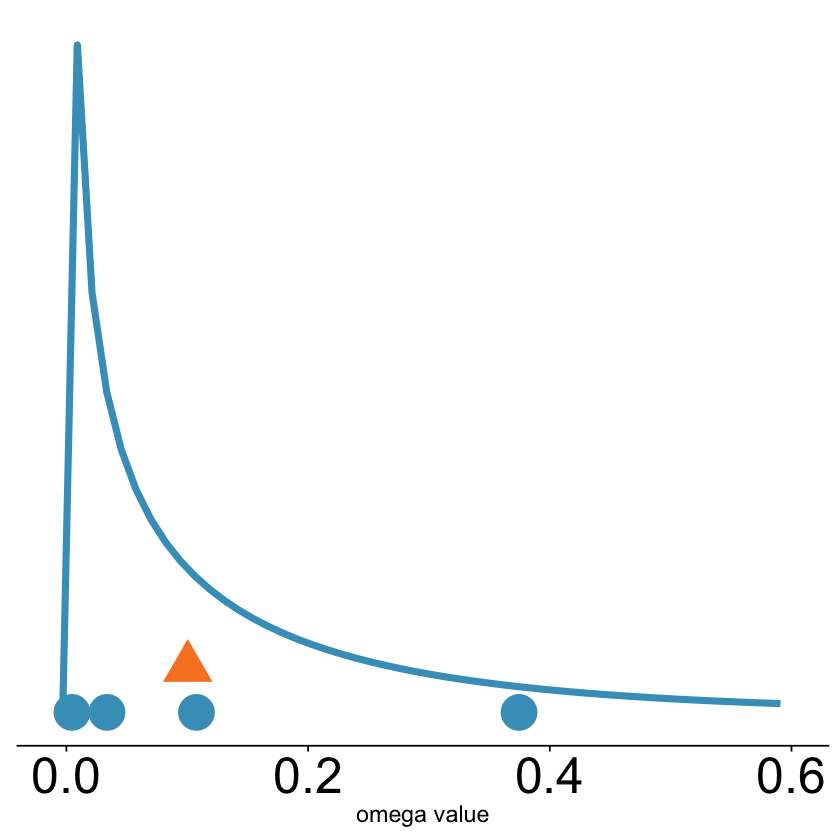

In [10]:
# set up gamma distribution
alpha_omega = 0.509
beta_omega = 3.92
x <- seq(-.1,1.1,length=100)
y <- dgamma(x, alpha_omega, beta_omega)
df <- data.frame(x,y)
# get the omega values
means = c(0.00458686,0.03361759,0.10764779,0.37455593,0.100413)
model = c("M5", "M5", "M5", "M5", "M0")
means = data.frame(means, model)
means$y_axis = append(rep(0, 4), 0.75)
means$model = factor(means$model, levels = c("M5", "M0"))


myColors <- c(blue, orange)
colorScale <- scale_color_manual(name = "Model", values = myColors)

omega <- ggplot(df, aes(x,y)) + geom_line(color=blue, size=2) 
omega <- omega + xlab("omega value") + theme(axis.text.x = element_text(size=30),axis.line.y = element_blank(), axis.ticks.y = element_blank(), axis.text.y = element_blank(), axis.title.y=element_blank(), legend.position = "none")
omega <- omega + colorScale + xlim(c(-.01, 0.6))
omega <- omega + geom_point(data=means, aes(means,y_axis, color=model, shape=model), size = 10)
omega
ggsave("_raw_omega.png")
means

## Decay to stationary state 

This plot shows the decay to stationary state for 4 different models: 

1. GY94 (YNGKP M0)
2. GY94 + $\Gamma\omega$ (YNGKP M5)
3. GY94 + $\omega_r$
4. ExpCM 

I picked 5 sites to represent different behaviors of the model.

    site        wr
17    17 0.4649330
28    28 0.3600653
183  183 0.1376943
199  199 0.9129625
305  305 0.1000608


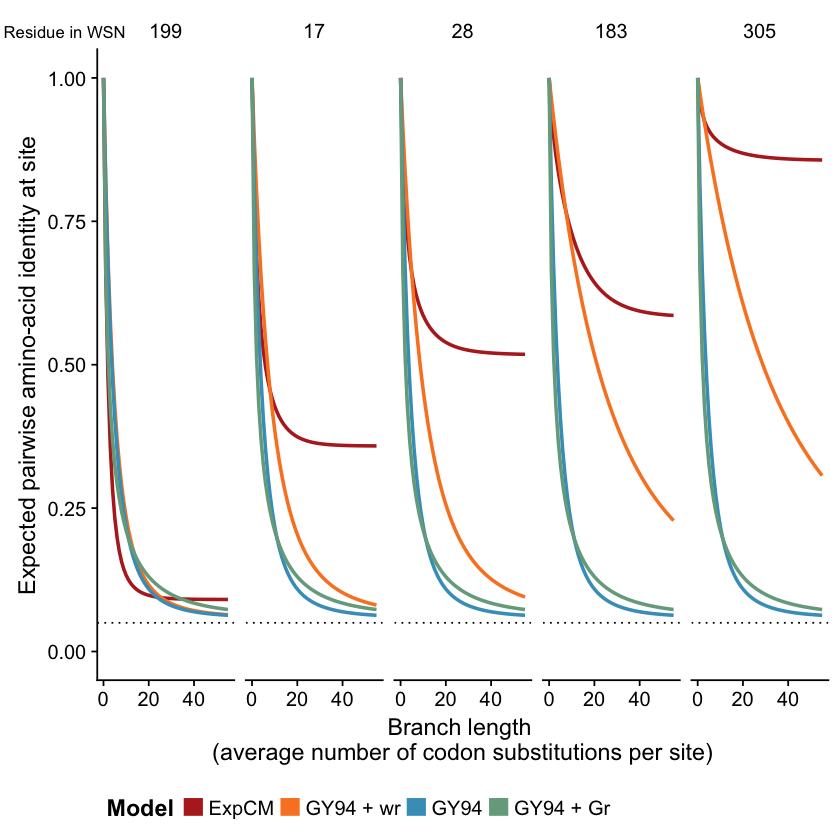

In [17]:
df = read.csv("../../analysis/decay_to_stationary/outputs/expected_identity_given_time_t.csv")
targets = c(199,17,28,183,305) # sites to include in the plot
time = 55 # width of the x-axis 
df = df[is.element(df$Site, targets),]

myColors <- c(red, orange, blue, green)
fillScale <- scale_fill_manual(name = "Model", values = myColors)
colorScale <- scale_color_manual(name = "Model", values = myColors)

df$Site_f = factor(df$Site, levels=targets)
df$Model = factor(df$Model, levels = c("ExpCM", "GY94 + wr", "GY94", "GY94 + Gr"))

df <- df[which(df[,3]<=time),]

p <- ggplot(df, aes(Time,f,color=Model)) + geom_line(size=1.0) + ylim(0,1.0) 
p <- p + facet_grid(~Site_f) + geom_hline(yintercept = 0.05, color = black, linetype = "dotted")
p <- p + theme(strip.background = element_blank(), legend.position = "bottom", legend.title= element_text(face="bold"), axis.text = element_text(size=12))
p <- p + xlab("Branch length \n(average number of codon substitutions per site)") + ylab("Expected pairwise amino-acid identity at site")
p <- p + colorScale + guides(colour = guide_legend(override.aes = list(size=5)))
ggdraw(p) + draw_label("Residue in WSN", x = 0.15, y = 0.97, vjust = 1, hjust = 1, size = 10)
ggsave("_raw_decay.png", width=9, height=5)

wr = read.csv("../../analysis/decay_to_stationary/outputs/spielman_wr.csv")
wr = wr[is.element(wr$site, targets),]
print(wr)

### Pref Snippets

  site          A          C          D         E         F         G         H
1   17 0.03421690 0.01733880 0.37154600 0.0518371 0.0132935 0.0943143 0.0187520
2   28 0.10072500 0.04717240 0.00690555 0.0492099 0.0129438 0.0295321 0.0296136
3  183 0.26010900 0.02373330 0.03387910 0.0175735 0.0111772 0.4732840 0.0119830
4  199 0.08223570 0.00573003 0.03202810 0.0358380 0.0263762 0.0657995 0.0585266
5  305 0.00926322 0.01485440 0.01748880 0.0353304 0.0176431 0.6381790 0.0105319
           I         K          L         M         N         P         Q
1 0.01245410 0.0297064 0.00771400 0.0273666 0.0512746 0.0175862 0.0233835
2 0.00997760 0.0416188 0.00930910 0.0229863 0.0844765 0.0140289 0.0243220
3 0.00871798 0.0140070 0.00597833 0.0171103 0.0139932 0.0108691 0.0197143
4 0.10120400 0.0531362 0.02991420 0.0547134 0.0455178 0.0382026 0.0479638
5 0.01884750 0.0365738 0.01758830 0.0195628 0.0266317 0.0133555 0.0218774
           R         S          T         V         W         Y
1 0.02453650

Saving 7 x 7 in image


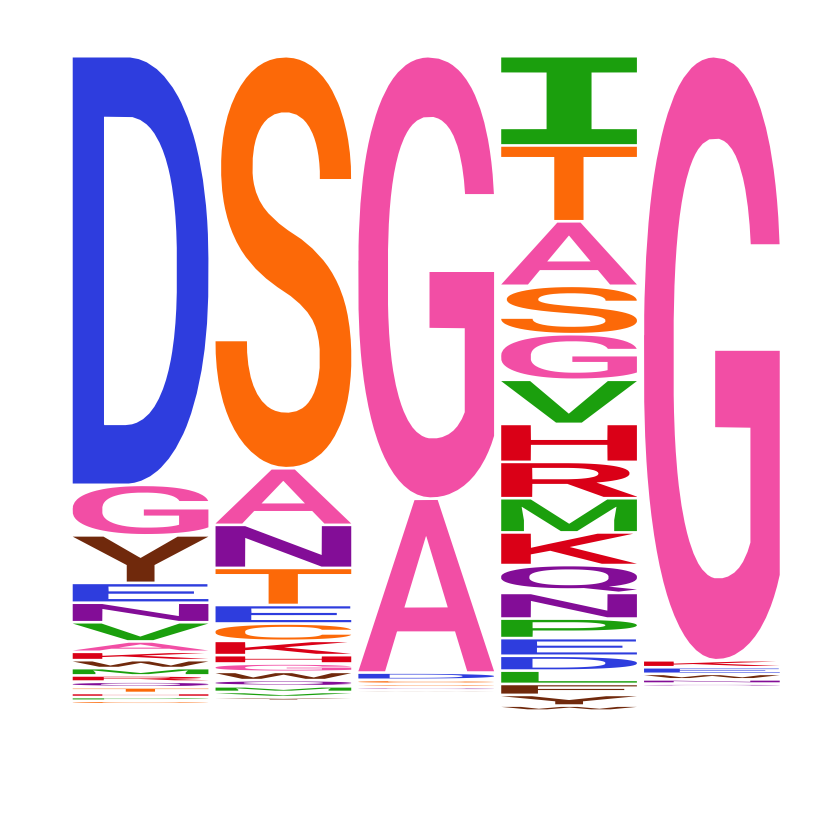

In [18]:
doud_prefs = read.csv("../../analysis/HA/data/references/HA_hybridDoud_prefs.csv") %>% filter(site %in% targets)
print(doud_prefs)
#make logoplots
prefs_doud = make_prefs_plot(list(H1=prefs_to_matrix(doud_prefs, 1.56)))
prefs_doud
ggsave("_raw_decay_prefs.pdf")

## Simulations

Below is the code to plot the inferred distance vs. true distance for different mdoels. 

In [11]:
df = read.csv("../../analysis/simulations/outputs/model_by_model.csv")
df$model_pair = factor(df$model_pair, levels = c("true/GY94",
                                                 "true/GY94_gammaomega", 
                                                 "true/ExpCM",
                                                 "true/ExpCM_gammaomega",
                                                 "true/ExpCM_averaged",
                                                 "true/ExpCM_gammaomega_averaged"))
means = read.csv("../../analysis/simulations/outputs/model_by_model_means.csv")


Saving 12 x 7 in image


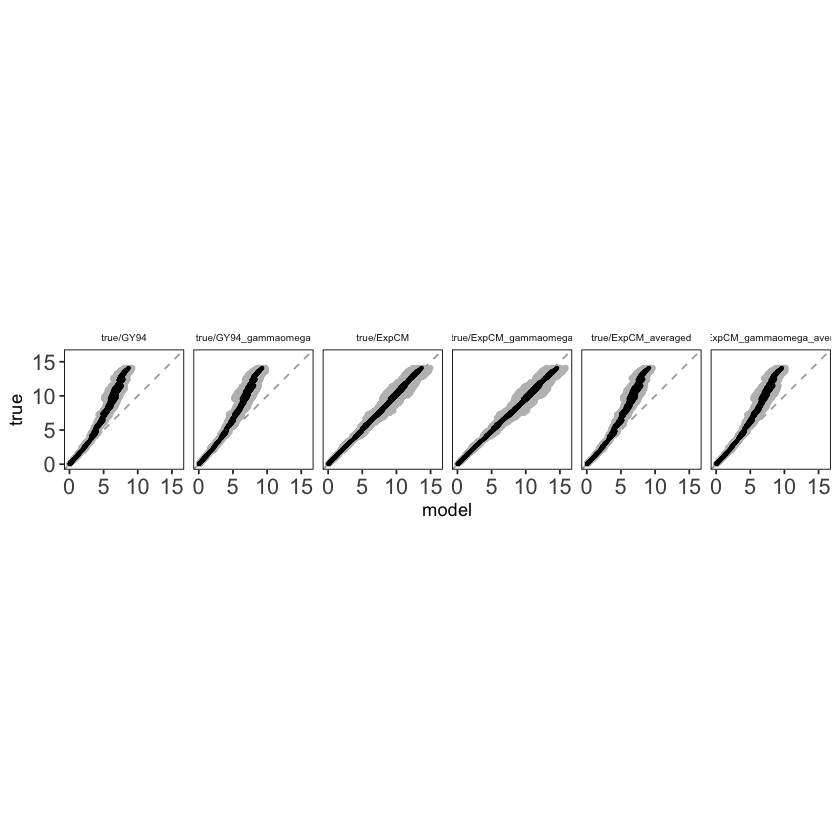

In [12]:
m <- ceiling(max(max(df$distance1), max(df$distance2)))
scatter = ggplot(df, aes(distance2, distance1)) + geom_abline(intercept=0, slope=1, color = "darkgrey", linetype="dashed") + geom_point(size=1.0, color="grey") 
scatter = scatter + facet_grid(~model_pair)
scatter = scatter + theme_bw()+ theme(panel.grid.major = element_blank(),
                    panel.grid.minor = element_blank(),
                    strip.background = element_blank(),
                    panel.border = element_rect(colour = "black"), 
                    strip.text = element_text(size=6),
                    axis.text = element_text(size=13))
scatter = scatter + xlim(c(0,m)) + ylim(c(0,m)) + coord_fixed() 
scatter = scatter + xlab("model") + ylab("true") + geom_point(size = 0.5, data = means)
scatter
ggsave("_raw_simulations.png", width=12)

## Empirical Data  

Below is the code to look at the trees optimized using different ExpCM models. The figure has four parts 

1. Preference snippets for H1, H3, and average prefs
2. Trees aligned to WSN
3. Trees aligned to Perth 
4. Trees aligned to the hybrid sequence

The trees are made using the R package [`ggtree`](https://bioconductor.org/packages/release/bioc/html/ggtree.html)

### Prefs snippet

Below is the code to make the prefs snippets. There will be a snippet for 

1. The GY94 "prefs"
2. Doud prefs
3. Lee prefs
4. Average prefs

The variables start and stop indicate the first and last position (hybrid sequential numbering)

Saving 4 x 7 in image


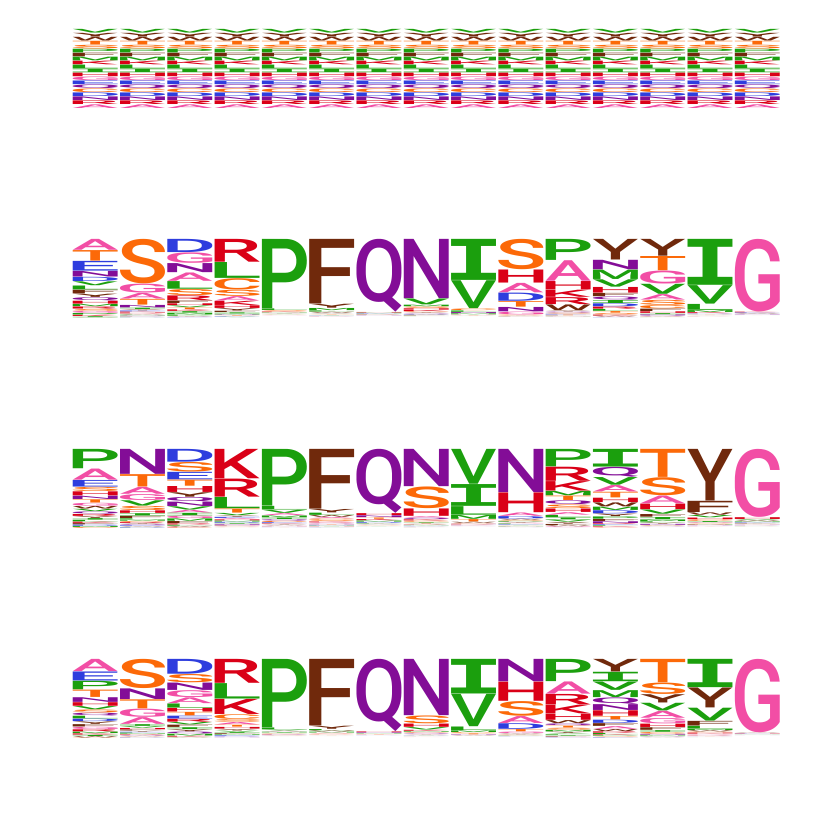

In [6]:
start = 290
stop = 306
map = read.csv("../../analysis/HA/data/references/hybrid_numbering.csv")
map = map[map$hybrid>start & map$hybrid<stop, ]

# subset prefs
doud_prefs = read.csv("../../analysis/HA/data/references/HA_Doud_prefs.csv") %>% filter(site %in% map$WSN)
lee_prefs = read.csv("../../analysis/HA/data/references/HA_Lee_prefs.csv") %>% filter(site %in% map$Perth)
average_prefs = read.csv("../../analysis/HA/data/references/HA_average_prefs.csv") %>% filter(site %in% map$hybrid)

# make GY94 prefs
GY_prefs = as.data.frame(matrix(0.05, ncol = 20, nrow = stop-start-1))
colnames(GY_prefs) = colnames(doud_prefs)[colnames(doud_prefs) != "site"]
GY_prefs$site = map$hybrid

#make logoplots
prefs_doud = make_prefs_plot(list(H1=prefs_to_matrix(doud_prefs, 1.54)))
prefs_average = make_prefs_plot(list(Average=prefs_to_matrix(average_prefs, 1.77)))
prefs_lee = make_prefs_plot(list(H3=prefs_to_matrix(lee_prefs, 1.76)))
prefs_gy = make_prefs_plot(list(GY=prefs_to_matrix(GY_prefs, 1.0)))
prefs = plot_grid(prefs_gy, prefs_doud, prefs_lee, prefs_average, ncol=1)
prefs
ggsave("_raw_empirical_prefs.png", width=4)

### Trees

Below is the code to make the tree for the empirical data figure. There will be a total of 8 trees 

1. GY94 (WSN alignment) 
2. GY94 + $\Gamma\omega$ (WSN alignment) 
3. ExpCM (H1) 
4. ExpCM + $\Gamma\omega$ (H1) 
3. ExpCM (H3) 
4. ExpCM + $\Gamma\omega$ (H3) 
3. ExpCM (average) 
4. ExpCM + $\Gamma\omega$ (average) 

In [4]:
max_distance <- 18
YNGKP_M0 <- make_tree("../../analysis/HA/branch_lengths/phydms/hybrid_high_0_YNGKP_M0_tree.newick", "GY94", max_distance, black)
YNGKP_M5 <- make_tree("../../analysis/HA/branch_lengths/phydms/hybrid_high_0_YNGKP_M5_tree.newick", "GY94 + G", max_distance, black)

ExpCM_doud <- make_tree("../../analysis/HA/branch_lengths/phydms/hybrid_high_0_ExpCM_HA_hybridDoud_prefs_tree.newick", "ExpCM (Doud)", max_distance, blue)
ExpCM_average <- make_tree("../../analysis/HA/branch_lengths/phydms/hybrid_high_0_ExpCM_HA_average_prefs_tree.newick", "ExpCM (average)", max_distance, green)
ExpCM_lee <- make_tree("../../analysis/HA/branch_lengths/phydms/hybrid_high_0_ExpCM_HA_hybridLee_prefs_tree.newick", "ExpCM (Lee)", max_distance, orange)

ExpCM_doud_gammaomega <- make_tree("../../analysis/HA/branch_lengths/phydms/hybrid_high_0_ExpCM_HA_hybridDoud_prefs_gammaomega_tree.newick", "ExpCM + G (Doud)", max_distance, blue)
ExpCM_average_gammaomega <- make_tree("../../analysis/HA/branch_lengths/phydms/hybrid_high_0_ExpCM_HA_average_prefs_gammaomega_tree.newick", "ExpCM + G (average)", max_distance, green)
ExpCM_lee_gammaomega <- make_tree("../../analysis/HA/branch_lengths/phydms/hybrid_high_0_ExpCM_HA_hybridLee_prefs_gammaomega_tree.newick", "ExpCM + G (Lee)", max_distance, orange)

GY = arrangeGrob(YNGKP_M0, YNGKP_M5, ncol=2)
tree_doud = arrangeGrob(ExpCM_doud, ExpCM_doud_gammaomega, ncol=2)
tree_lee = arrangeGrob(ExpCM_lee, ExpCM_lee_gammaomega, ncol=2)
tree_average = arrangeGrob(ExpCM_average, ExpCM_average_gammaomega, ncol=2)

trees = plot_grid(GY, tree_doud, tree_lee, tree_average, ncol=1)
trees
ggsave("_raw_empirical_trees.png", width=5)

## Shifting Preferences vs. Long Branches


In [4]:
lee_tree <- make_tree("../../analysis/HA/branch_lengths/phydms/hybrid_high_0_YNGKP_M0_tree.newick", "", 7, orange)
ggsave("_raw_compete_lee_tree.png")
doud_tree <- make_tree("../../analysis/HA/branch_lengths/phydms/hybrid_high_0_YNGKP_M0_tree.newick", "", 7, blue)
ggsave("_raw_compete_doud_tree.png")

Saving 7 x 7 in image
Saving 7 x 7 in image


In [9]:
start = 290
stop = 306
map = read.csv("../../analysis/HA/data/references/hybrid_numbering.csv")
map = map[map$hybrid>start & map$hybrid<stop, ]

# subset prefs
doud_prefs = read.csv("../../analysis/HA/data/references/HA_Doud_prefs.csv") %>% filter(site %in% map$WSN)
lee_prefs = read.csv("../../analysis/HA/data/references/HA_Lee_prefs.csv") %>% filter(site %in% map$Perth)

#make logoplots (Doud)
prefs_doud_low = make_prefs_plot(list(H1=prefs_to_matrix(doud_prefs, 1.56)))
prefs_doud_intermediate = make_prefs_plot(list(H1=prefs_to_matrix(doud_prefs, 1.34)))
prefs_doud_high = make_prefs_plot(list(H1=prefs_to_matrix(doud_prefs, 1.21)))
doud_prefs = plot_grid(prefs_doud_low, prefs_doud_intermediate, prefs_doud_high, ncol=1)
ggsave("_raw_compete_doud_prefs.png")

#make logoplots (Lee)
prefs_lee_low = make_prefs_plot(list(H1=prefs_to_matrix(lee_prefs, 2.08)))
prefs_lee_intermediate = make_prefs_plot(list(H1=prefs_to_matrix(lee_prefs, 1.77)))
prefs_lee_high = make_prefs_plot(list(H1=prefs_to_matrix(lee_prefs, 1.44)))
lee_prefs = plot_grid(prefs_lee_low, prefs_lee_intermediate, prefs_lee_high, ncol=1)
ggsave("_raw_compete_lee_prefs.png")

Saving 7 x 7 in image
Saving 7 x 7 in image


## `phylobayes` comparison

Below is the code to create the scatter plot between the branch lengths estimated by ExpCM + $\Gamma\omega$ with the average preferences and `phylobayes` on from the "high divergence" alignment. 

Saving 7 x 7 in image


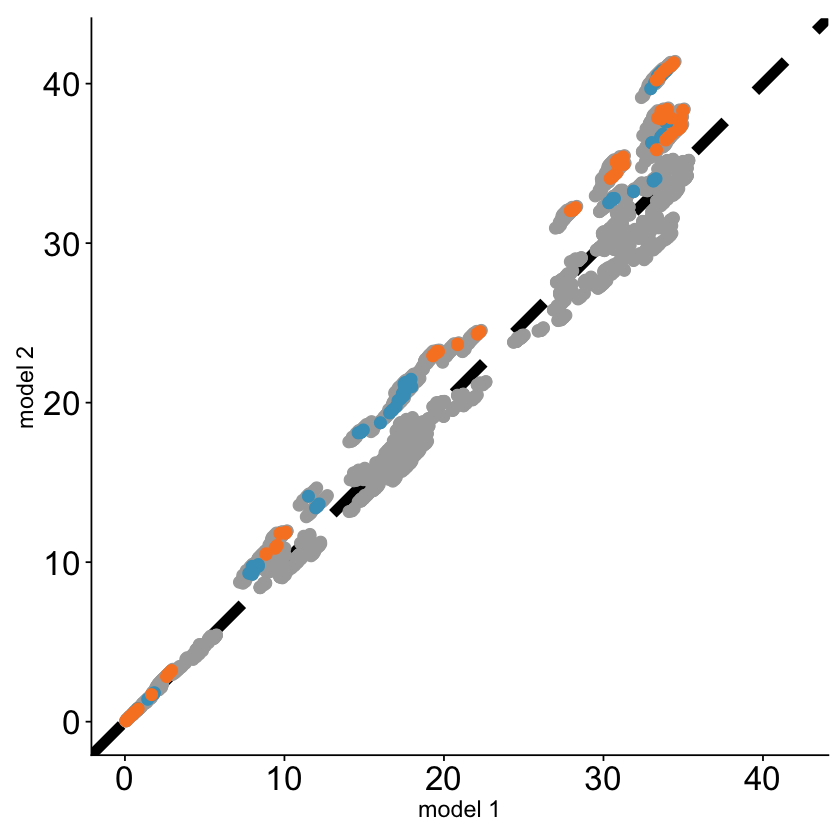

In [6]:
df = read.csv("../../analysis/phylobayes/outputs/model_by_model.csv")
df = subset(df, alignment_id == "hybrid_high_0")
df = subset(df, model_pair == "pb/ExpCM_gammaomega_average")

pt_size = 3 

m <- ceiling(max(max(df$distance1), max(df$distance2)))
scatter = ggplot(df, aes(distance1, distance2)) + geom_abline(intercept=0, slope=1, color = "black", linetype="dashed", size=3) + geom_point(size=pt_size, color="darkgrey") 
scatter = scatter + theme(strip.background = element_blank(), strip.text = element_text(size=8), legend.position="bottom", panel.spacing = unit(2, "lines"), panel.border = element_rect(colour = "black"), axis.text=element_text(size=20))
scatter = scatter + xlim(c(0,m)) + ylim(c(0,m)) + coord_fixed() 
scatter = scatter + xlab("model 1") + ylab("model 2") + geom_point(size=pt_size, data = subset(df, from_ref == 'WSN'), color=blue) + ylab("model 2") + geom_point(size=pt_size, data = subset(df, from_ref == 'Perth'), color=orange)
scatter
ggsave("_raw_phylobayes.png")

## Logoplots

Below is the code to make the logoplots representing the deep mutational scanning preferences from Mike's H1 WSN scan ([doud2016accurate](http://www.mdpi.com.offcampus.lib.washington.edu/1999-4915/8/6/155)) and Juhye's H3 Perth/09 scan ([lee2017Perth]()).

The logoplots are created [`phydms_logoplot`](http://jbloomlab.github.io/phydms/phydms_logoplot.html).

### Doud logoplots

In [1]:
cmd = "phydms_logoplot prefs_doud.pdf --prefs ../../analysis/HA/data/references/HA_Doud_prefs.csv --stringency 1.19 --nperline 113"
system(cmd, intern=TRUE)

[1] ""                                                                                                                                                                     
 [2] "Beginning execution of phydms_logoplot in directory /Users/sarah/Google Drive/GS/lab/divergence_timing_manuscript/manuscript/figures at time Mon Jan 22 09:05:52 2018"
 [3] ""                                                                                                                                                                     
 [4] "Version information:"                                                                                                                                                 
 [5] "\tTime and date: Mon Jan 22 09:05:52 2018"                                                                                                                            
 [6] "\tPlatform: Darwin-15.6.0-x86_64-i386-64bit"                                                                                                                          
 [7] "\tPython version: 3.5.2 (v3.5.2:4def2a2901a5, Jun 26 2016, 10:47:25)  [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]"                                                    
 [8] "\tphydms version: 2.2.dev1"                                                                                                                                           
 [9] "\tBio version: 1.68"                                                                                                                                                  
[10] "\tcython version: 0.27.3"                                                                                                                                             
[11] "\tnumpy version: 1.13.3"                                                                                                                                              
[12] "\tscipy version: 0.19.0"                                                                                                                                              
[13] "\tmatplotlib version: 2.0.2"                                                                                                                                          
[14] "\tnatsort version: 5.1.1"                                                                                                                                             
[15] "\tsympy version: 1.0"                                                                                                                                                 
[16] "\tsix version: 1.10.0"                                                                                                                                                
[17] "\tpandas version: 0.20.3"                                                                                                                                             
[18] "\tpyvolve version: 0.8.4"                                                                                                                                             
[19] "\tstatsmodels version: 0.8.0"                                                                                                                                         
[20] "\tweblogolib version: 3.5.0"                                                                                                                                          
[21] "\tPyPDF2 version: 1.26.0"                                                                                                                                             
[22] ""                                                                                                                                                                     
[23] "Parsed the following command-line arguments:"                                                                                                                         
[24] "\tomegabysite = 

### Lee logoplots

In [2]:
cmd = "phydms_logoplot prefs_lee.pdf --prefs ../../analysis/HA/data/references/HA_Lee_prefs.csv --stringency 1.46 --nperline 113"
system(cmd, intern=TRUE)

[1] ""                                                                                                                                                                     
 [2] "Beginning execution of phydms_logoplot in directory /Users/sarah/Google Drive/GS/lab/divergence_timing_manuscript/manuscript/figures at time Mon Jan 22 09:10:21 2018"
 [3] ""                                                                                                                                                                     
 [4] "Version information:"                                                                                                                                                 
 [5] "\tTime and date: Mon Jan 22 09:10:21 2018"                                                                                                                            
 [6] "\tPlatform: Darwin-15.6.0-x86_64-i386-64bit"                                                                                                                          
 [7] "\tPython version: 3.5.2 (v3.5.2:4def2a2901a5, Jun 26 2016, 10:47:25)  [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]"                                                    
 [8] "\tphydms version: 2.2.dev1"                                                                                                                                           
 [9] "\tBio version: 1.68"                                                                                                                                                  
[10] "\tcython version: 0.27.3"                                                                                                                                             
[11] "\tnumpy version: 1.13.3"                                                                                                                                              
[12] "\tscipy version: 0.19.0"                                                                                                                                              
[13] "\tmatplotlib version: 2.0.2"                                                                                                                                          
[14] "\tnatsort version: 5.1.1"                                                                                                                                             
[15] "\tsympy version: 1.0"                                                                                                                                                 
[16] "\tsix version: 1.10.0"                                                                                                                                                
[17] "\tpandas version: 0.20.3"                                                                                                                                             
[18] "\tpyvolve version: 0.8.4"                                                                                                                                             
[19] "\tstatsmodels version: 0.8.0"                                                                                                                                         
[20] "\tweblogolib version: 3.5.0"                                                                                                                                          
[21] "\tPyPDF2 version: 1.26.0"                                                                                                                                             
[22] ""                                                                                                                                                                     
[23] "Parsed the following command-line arguments:"                                                                                                                         
[24] "\tcolormap = jet

### Average logoplots

In [1]:
cmd = "phydms_logoplot prefs_average.pdf --prefs ../../analysis/HA/data/references/HA_average_prefs.csv --stringency 1.77 --nperline 113"
system(cmd, intern=TRUE)

[1] ""                                                                                                                                                                     
 [2] "Beginning execution of phydms_logoplot in directory /Users/sarah/Google Drive/GS/lab/divergence_timing_manuscript/manuscript/figures at time Mon Jan 22 09:10:12 2018"
 [3] ""                                                                                                                                                                     
 [4] "Version information:"                                                                                                                                                 
 [5] "\tTime and date: Mon Jan 22 09:10:12 2018"                                                                                                                            
 [6] "\tPlatform: Darwin-15.6.0-x86_64-i386-64bit"                                                                                                                          
 [7] "\tPython version: 3.5.2 (v3.5.2:4def2a2901a5, Jun 26 2016, 10:47:25)  [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]"                                                    
 [8] "\tphydms version: 2.2.dev1"                                                                                                                                           
 [9] "\tBio version: 1.68"                                                                                                                                                  
[10] "\tcython version: 0.27.3"                                                                                                                                             
[11] "\tnumpy version: 1.13.3"                                                                                                                                              
[12] "\tscipy version: 0.19.0"                                                                                                                                              
[13] "\tmatplotlib version: 2.0.2"                                                                                                                                          
[14] "\tnatsort version: 5.1.1"                                                                                                                                             
[15] "\tsympy version: 1.0"                                                                                                                                                 
[16] "\tsix version: 1.10.0"                                                                                                                                                
[17] "\tpandas version: 0.20.3"                                                                                                                                             
[18] "\tpyvolve version: 0.8.4"                                                                                                                                             
[19] "\tstatsmodels version: 0.8.0"                                                                                                                                         
[20] "\tweblogolib version: 3.5.0"                                                                                                                                          
[21] "\tPyPDF2 version: 1.26.0"                                                                                                                                             
[22] ""                                                                                                                                                                     
[23] "Parsed the following command-line arguments:"                                                                                                                         
[24] "\toutfile = pref

### mutSel logoplots

In [3]:
cmd = "phydms_logoplot prefs_mutSel.pdf --prefs ../../analysis/phylobayes/outputs/hybrid_high_0_prefs.csv --nperline 111"
system(cmd, intern=TRUE)

[1] ""                                                                                                                                                                     
 [2] "Beginning execution of phydms_logoplot in directory /Users/sarah/Google Drive/GS/lab/divergence_timing_manuscript/manuscript/figures at time Tue Feb 27 21:16:01 2018"
 [3] ""                                                                                                                                                                     
 [4] "Version information:"                                                                                                                                                 
 [5] "\tTime and date: Tue Feb 27 21:16:01 2018"                                                                                                                            
 [6] "\tPlatform: Darwin-15.6.0-x86_64-i386-64bit"                                                                                                                          
 [7] "\tPython version: 3.5.2 (v3.5.2:4def2a2901a5, Jun 26 2016, 10:47:25)  [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]"                                                    
 [8] "\tphydms version: 2.2.dev1"                                                                                                                                           
 [9] "\tBio version: 1.68"                                                                                                                                                  
[10] "\tcython version: 0.27.3"                                                                                                                                             
[11] "\tnumpy version: 1.14.1"                                                                                                                                              
[12] "\tscipy version: 0.19.0"                                                                                                                                              
[13] "\tmatplotlib version: 2.0.2"                                                                                                                                          
[14] "\tnatsort version: 5.1.1"                                                                                                                                             
[15] "\tsympy version: 1.0"                                                                                                                                                 
[16] "\tsix version: 1.11.0"                                                                                                                                                
[17] "\tpandas version: 0.22.0"                                                                                                                                             
[18] "\tpyvolve version: 0.8.4"                                                                                                                                             
[19] "\tstatsmodels version: 0.8.0"                                                                                                                                         
[20] "\tweblogolib version: 3.5.0"                                                                                                                                          
[21] "\tPyPDF2 version: 1.26.0"                                                                                                                                             
[22] ""                                                                                                                                                                     
[23] "Parsed the following command-line arguments:"                                                                                                                         
[24] "\tnumberevery = 